In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
cols = [
    'time1_(s)',
    'temp1_(C)',
    'epoch_time1',
    'time2_(s)',
    'temp2_(C)',
    'epoch_time2',
]
df = pd.read_csv("thermistor data/3-22-23/27909890276900_temperature.csv", usecols=cols)
# df = pd.read_csv("thermistor data/last dataset before alex left.csv", usecols=cols)
filt = ~df['time1_(s)'].isnull() & ~df['time2_(s)'].isnull()
df = df.loc[filt]

In [5]:
df

,time1_(s),temp1_(C),epoch_time1,time2_(s),temp2_(C),epoch_time2
0,0.371837,22.024764,1.350905e+13,0.906756,22.025138,1.350958e+13
1,1.433386,22.024718,1.351011e+13,1.971682,22.025084,1.351065e+13
2,2.496600,22.024744,1.351117e+13,3.032295,22.025333,1.351171e+13
3,3.564451,22.024838,1.351224e+13,4.091231,22.025232,1.351277e+13
4,4.619075,22.024736,1.351330e+13,5.152285,22.024930,1.351383e+13
...,...,...,...,...,...,...
13451,14396.229507,22.024496,2.790491e+13,14396.761414,22.024748,2.790544e+13
13452,14397.293413,22.024490,2.790597e+13,14397.821218,22.024984,2.790650e+13
13453,14398.361213,22.024540,2.790704e+13,14398.886343,22.024641,2.790756e+13
13454,14399.434479,22.024599,2.790811e+13,14399.969174,22.024938,2.790865e+13


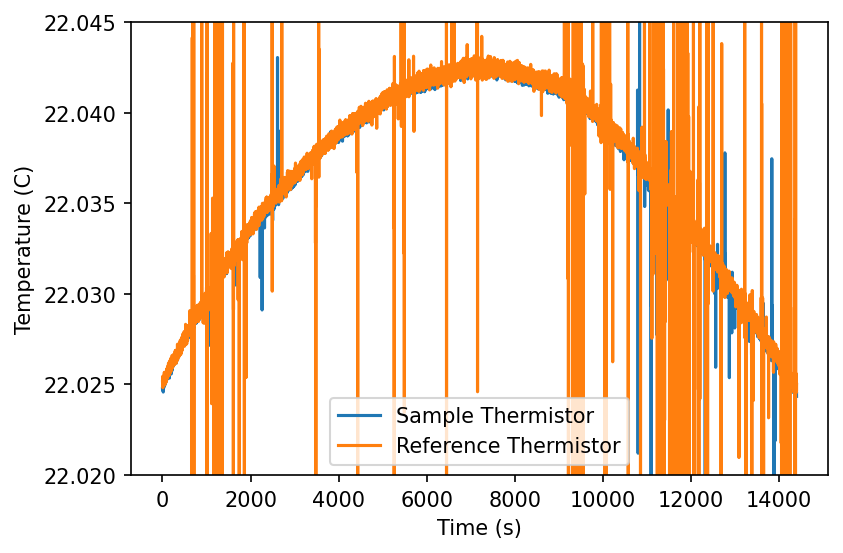

In [6]:
fig, ax = plt.subplots(dpi = 150)
x1 = df['time1_(s)']
y1 = df['temp1_(C)']
x2 = df['time2_(s)']
y2 = df['temp2_(C)']
ax.plot(x1, y1, label = 'Sample Thermistor')
ax.plot(x2, y2, label = 'Reference Thermistor')

ax.set_ylim(22.02, 22.045)
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Time (s)')
ax.legend()

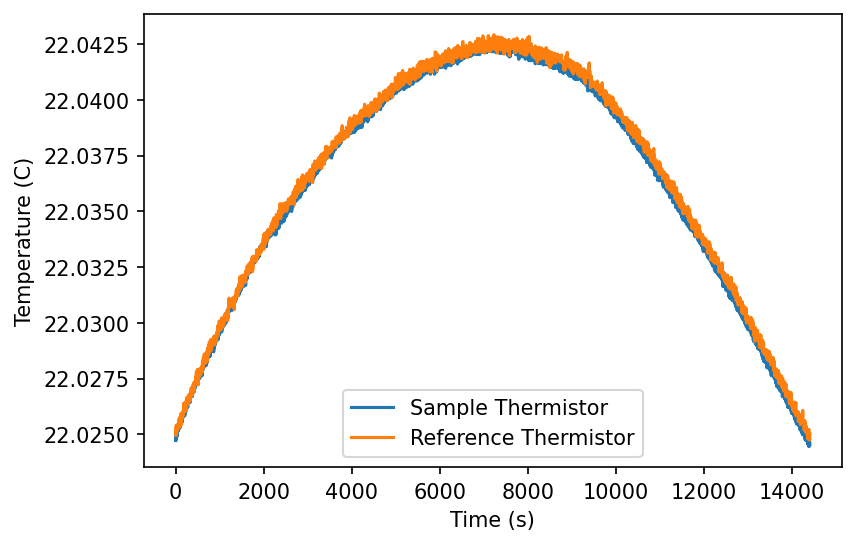

In [7]:
std1 = df['temp1_(C)'].std()
mean1 = df['temp1_(C)'].mean()
std2 = df['temp2_(C)'].std()
mean2 = df['temp2_(C)'].mean()

differential_threshold = 0.0001
dy1 = (df['temp1_(C)'] - df['temp1_(C)'].shift(periods=1, axis=0))
dx1 = (df['time1_(s)'] - df['time1_(s)'].shift(periods=1, axis=0))
differential1 = (dy1/dx1).abs()
filt1 = (differential1 <= differential_threshold) 
dy2 = (df['temp2_(C)'] - df['temp2_(C)'].shift(periods=1, axis=0))
dx2 = (df['time2_(s)'] - df['time2_(s)'].shift(periods=1, axis=0))
differential2 = (dy2/dx2).abs()
filt2 = (differential2 <= differential_threshold) 

x1 = df.loc[filt1, 'time1_(s)']
x2 = df.loc[filt2, 'time2_(s)']
y1 = df.loc[filt1, 'temp1_(C)']
y2 = df.loc[filt2, 'temp2_(C)']

fig, ax = plt.subplots(dpi = 150)
ax.plot(x1, y1, label = 'Sample Thermistor')
ax.plot(x2, y2, label = 'Reference Thermistor')
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Time (s)')
ax.legend()

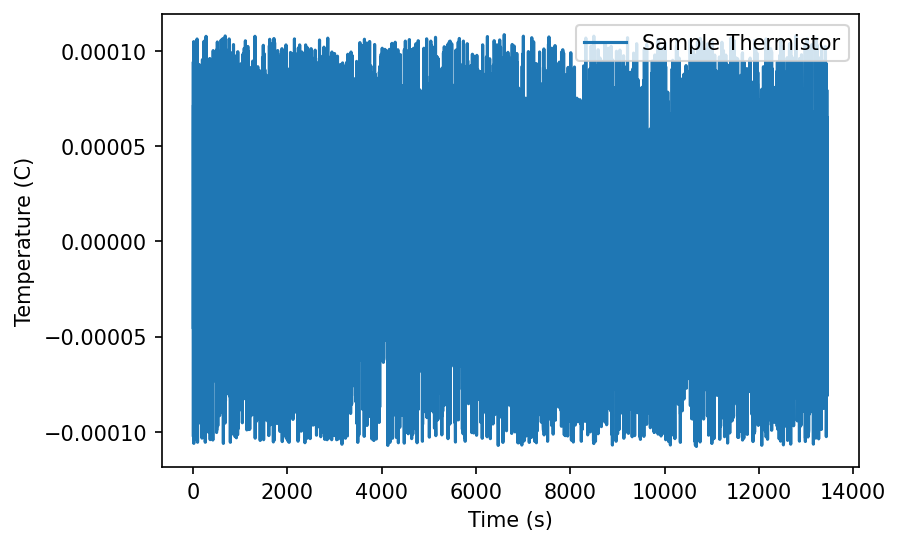

In [17]:
fig, ax = plt.subplots(dpi = 150)
ax.plot(dy1.loc[filt1], label = 'Sample Thermistor')
# ax.plot(x2, y2, label = 'Reference Thermistor')
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Time (s)')
ax.legend()

Text(0.5, 0, 'Time (s)')

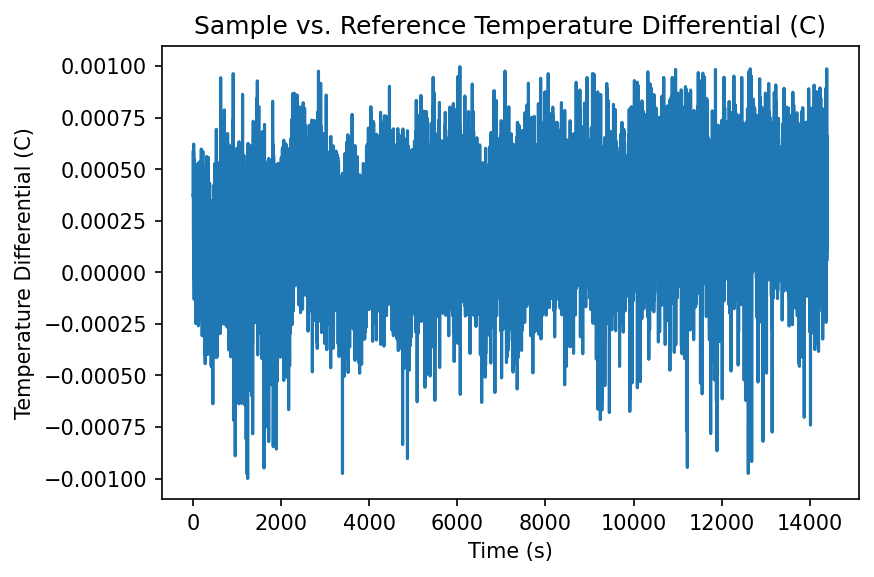

In [9]:
differential_threshold = 0.001
filt = ((df['temp2_(C)'] - df['temp1_(C)']).abs() <= differential_threshold)

time = df.loc[filt, 'time1_(s)']
TempDifference = (df.loc[filt, 'temp2_(C)'] - df.loc[filt, 'temp1_(C)'])

fig, ax = plt.subplots(dpi = 150)  
ax.plot(time, TempDifference)
ax.set_title('Sample vs. Reference Temperature Differential (C)')
ax.set_ylabel('Temperature Differential (C)')
ax.set_xlabel('Time (s)')
# print(diff)

<AxesSubplot:xlabel='Rolling Index', ylabel='Standard Deviation'>

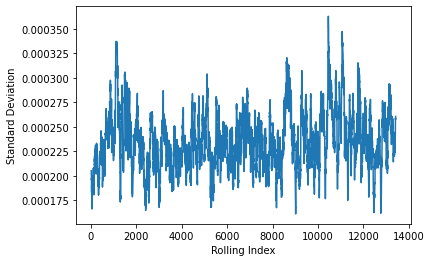

In [10]:
# (TempDifference.rolling(1500).mean() - TempDifference.rolling(1000).std()).plot()
rollingWindow = 60
stdDev = TempDifference.rolling(rollingWindow, center = True).std()
# stdDevMean = TempDifference.rolling(rollingWindow).std().mean()

# fig, ax = plt.subplots(150)
stdDev.plot(xlabel = 'Rolling Index', ylabel = 'Standard Deviation')

Text(0.5, 0, 'Time (s)')

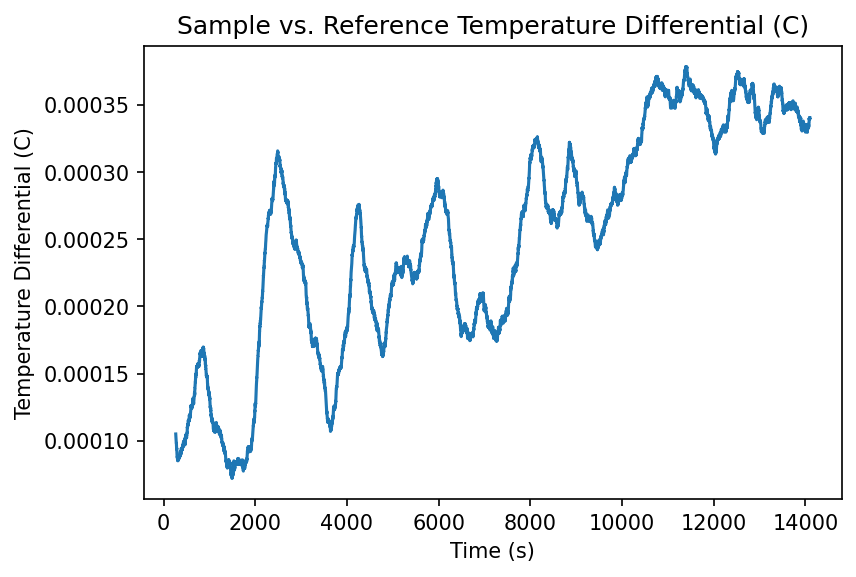

In [11]:
differential_threshold = 0.001
filt = ((df['temp2_(C)'] - df['temp1_(C)']).abs() <= differential_threshold)

time = df.loc[filt, 'time1_(s)'].rolling(500).mean()
TempDifference = (df.loc[filt, 'temp2_(C)'] - df.loc[filt, 'temp1_(C)']).rolling(500).mean()

fig, ax = plt.subplots(dpi = 150)  
ax.plot(time, TempDifference)
ax.set_title('Sample vs. Reference Temperature Differential (C)')
ax.set_ylabel('Temperature Differential (C)')
ax.set_xlabel('Time (s)')


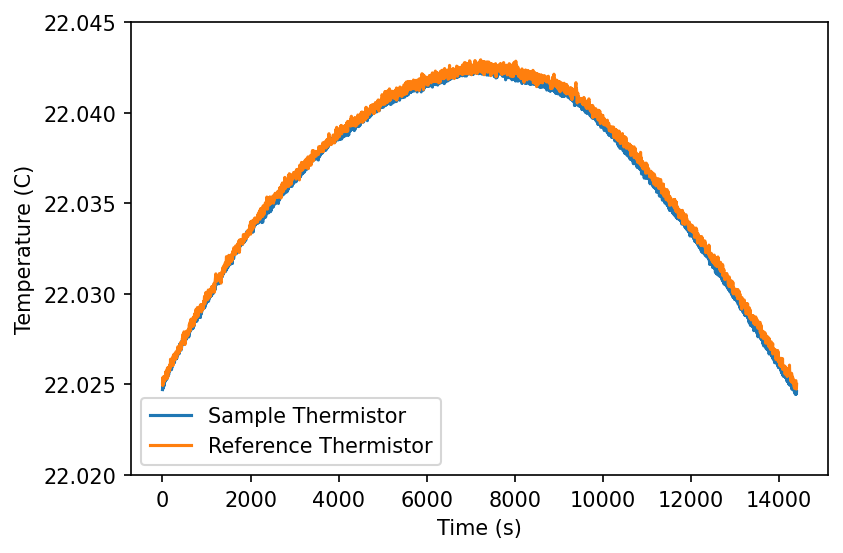

In [12]:
fig, ax = plt.subplots(dpi = 150)
x1 = df.loc[filt1, 'time1_(s)']
y1 = df.loc[filt1, 'temp1_(C)']
x2 = df.loc[filt2, 'time2_(s)']
y2 = df.loc[filt2, 'temp2_(C)']
ax.plot(x1, y1, label = 'Sample Thermistor')
ax.plot(x2, y2, label = 'Reference Thermistor')

ax.set_ylim(22.02, 22.045)
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Time (s)')
ax.legend()

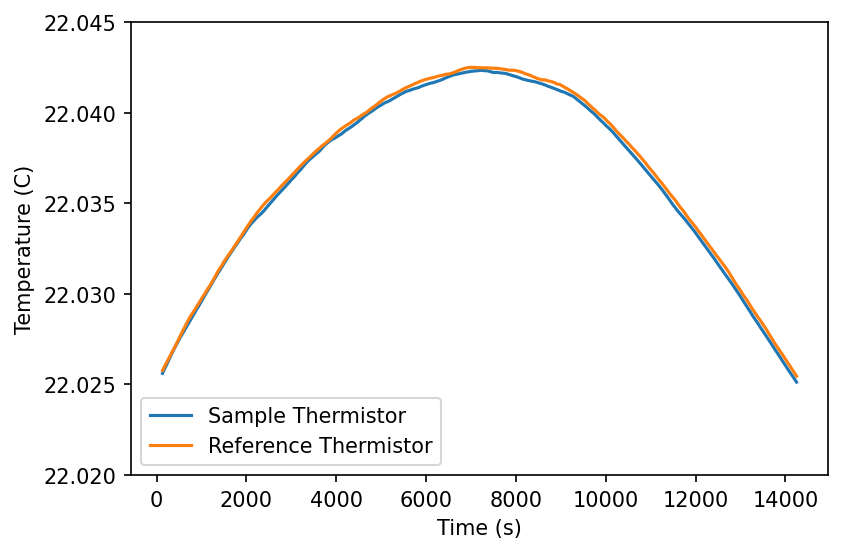

In [13]:
# df.plot(['time1_(s)', 'time2_(s)'], ['temp1_(C)', 'temp2_(C)'])
rolling_window = 250
fig, ax = plt.subplots(dpi = 150)
x1 = df.loc[filt, 'time1_(s)'].rolling(rolling_window, center = True).mean()
y1 = df.loc[filt, 'temp1_(C)'].rolling(rolling_window, center = True).mean()
x2 = df.loc[filt, 'time2_(s)'].rolling(rolling_window, center = True).mean()
y2 = df.loc[filt, 'temp2_(C)'].rolling(rolling_window, center = True).mean()
ax.plot(x1, y1, label = 'Sample Thermistor')
ax.plot(x2, y2, label = 'Reference Thermistor')

ax.set_ylim(22.02, 22.045)
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Time (s)')
ax.legend()
# df.plot('time1_(s)', 'temp1_(C)')
# df.plot('time2_(s)', 'temp2_(C)')
# df.plot(x)

In [14]:
# from scipy.fft import fft, fftfreq
# N = len(y1)
# ft = fft(y1)

Text(0.5, 1.0, 'Temperature Differential: Sample - Reference Thermistors')

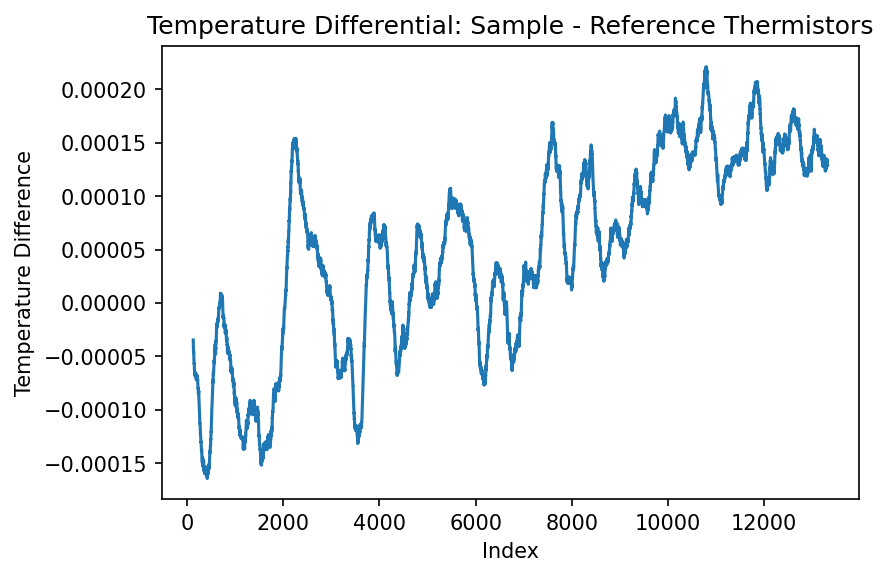

In [15]:
fig, ax = plt.subplots(dpi = 150)
# difference = df.loc[filt,'temp1_(C)'] - df.loc[filt,'temp2_(C)'] + .00022
difference = y2 - y1 - 0.0002
ax.plot(difference)
# ax.plot(difference.rolling(1500).mean())

# ax.set_ylim(-0.0001, 0.0001)
# ax.set_xlim(2000,7000)
ax.set_xlabel('Index')
ax.set_ylabel('Temperature Difference')
ax.set_title('Temperature Differential: Sample - Reference Thermistors')

In [16]:
rolling_window = 800
mean = df.rolling(rolling_window, center = True).mean()
minm = df.rolling(rolling_window, center = True).min()
maxm = df.rolling(rolling_window, center = True).max()
filt = ~mean['time1_(s)'].isnull()
mean = mean.loc[filt]
filt = ~minm['Time (s)'].isnull()
minm = minm.loc[filt]
filt = ~maxm['Time (s)'].isnull()
maxm = maxm.loc[filt]

std = df.loc[:, 'Temp Converted 3-constants (C)'].rolling(rolling_window).std()
filt = ~std.isnull()
std = std.loc[filt]

KeyError: 'Time (s)'

In [ ]:
# std
display(maxm)
display(minm)
display(maxm - minm)
# display(df)

,Time (s),Temp Converted 3-constants (C)
400,57.863051,22.381331
401,57.933314,22.381331
402,58.006333,22.381331
403,58.074202,22.381331
404,58.141033,22.381331
...,...,...
193399,14399.683513,22.328211
193400,14399.751365,22.328211
193401,14399.818250,22.328211
193402,14399.934539,22.328211


,Time (s),Temp Converted 3-constants (C)
400,0.068225,22.162107
401,0.135972,22.162107
402,0.203176,22.162107
403,0.292938,22.162107
404,0.360099,22.162107
...,...,...
193399,14338.511978,22.121735
193400,14338.578792,22.121735
193401,14338.694051,22.121735
193402,14338.761968,22.121735


,Time (s),Temp Converted 3-constants (C)
400,57.794826,0.219224
401,57.797342,0.219224
402,57.803157,0.219224
403,57.781264,0.219224
404,57.780935,0.219224
...,...,...
193399,61.171535,0.206476
193400,61.172572,0.206476
193401,61.124198,0.206476
193402,61.172570,0.206476


<AxesSubplot:xlabel='Rolling Window Index', ylabel='Standard Deviation (C)'>

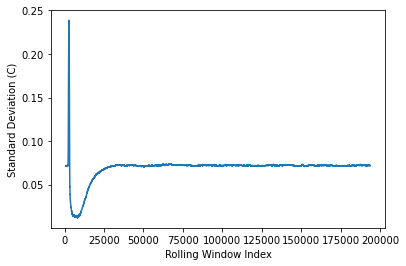

In [ ]:
# std[5000:].plot()
std.plot(ylabel = 'Standard Deviation (C)', xlabel = 'Rolling Window Index')
# filt = (std <= 0.0001)
# std.loc[filt].plot()

In [ ]:
cols = [
    'Time (s)',
    'Temp Converted 3-constants (C)',
    'Epoch Time',
]
# df = pd.read_csv("thermistor data/reference thermistor/906249197524200_temperature.csv", usecols=cols)
# filt = ~df['Time (s)'].isnull()
# df = df.loc[filt]

path = "./thermistor data/reference thermistor/"
files = os.listdir(path)
for file in files:
    # print(path + file)
    df = pd.read_csv(path + file)